<a href="https://colab.research.google.com/github/N1khil-J4dhav/College/blob/main/Experiment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [ ]:
X, y = make_classification(n_samples=500, n_features=2,
                           n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator,
                              n_estimators=100,
                              learning_rate=1.0,
                              random_state=42)

In [ ]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

In [ ]:
y_pred = adaboost.predict(X_test)

In [ ]:
# Step 7: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("🔹 Accuracy:", round(accuracy * 100, 2), "%\n")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 88.0 %

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.88      0.88      0.88        75

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



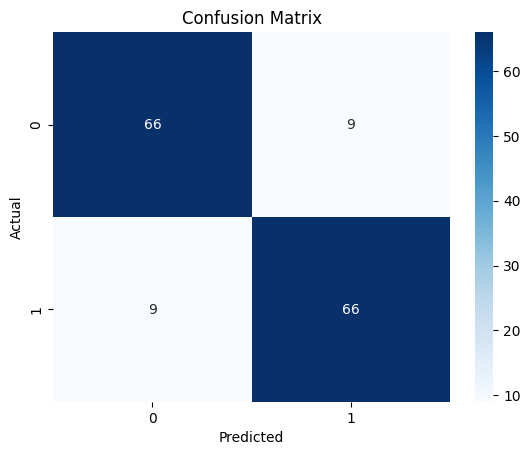

In [ ]:
# Step 8: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

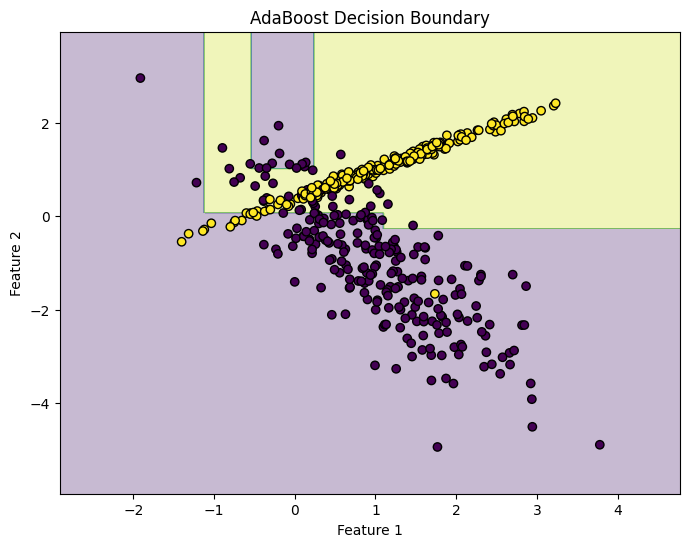

In [ ]:
# Step 9: Decision boundary visualization
plt.figure(figsize=(8,6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("AdaBoost Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()